# Exercise Sheet 5 - Variational Autoencoders

- Deep Learning for Computer Vision - Winter Term 2024/25
- Lecture by: Constantin Pape
- Tutors: Anwai Archit, Oleg Bakumenko, Luca Freckmann, Marei Freitag, Sarah Muth, Sushmita Nair
- Due date: **Tuesday, Jan 14, before 10:00**

In this exercise a variational autoencoder (VAE) shall be implemented and trained on the fashion MNIST dataset. VAEs are an example of generative deep learning and can be used to synthesize data - images in this case - which shall also be demonstrated in this exercise!

## What is a Variational Autoencoder (VAE)?

A **Variational Autoencoder (VAE)** is a type of generative model in deep learning that is used to learn the underlying distribution of data, enabling the generation of new, similar data. VAEs are an improvement over traditional autoencoders because they incorporate a probabilistic approach to learning latent representations.

### Key Features of a VAE:
1. **Latent Space Representation**:
   - A VAE encodes the input data (e.g., images) into a latent space where similar data points are placed close to each other.
   - This latent space is probabilistic and typically modeled as a Gaussian distribution.

2. **Reparameterization Trick**:
   - During training, VAEs sample from the latent distribution using a technique called the reparameterization trick. This ensures the model can backpropagate gradients effectively.

3. **Generative Nature**:
   - After training, new data can be generated by sampling points from the latent space and decoding them back into the data space.

4. **Loss Function**:
   - The loss function in a VAE combines two components:
     - **Reconstruction Loss**: Measures how well the decoder reconstructs the input data.
     - **KL Divergence**: Regularizes the latent space to resemble a standard Gaussian distribution.

---

## What is the Fashion MNIST Dataset?

The **Fashion MNIST dataset** is a popular dataset in machine learning used for benchmarking image classification and generation tasks. It serves as a replacement for the original MNIST dataset (digits), focusing on clothing and fashion items.

### Characteristics of the Fashion MNIST Dataset:
- **Content**:
  - The dataset contains grayscale images of size 28x28 pixels, depicting 10 different classes of clothing and accessories.
  - Each image is labeled with one of the following classes:
    1. T-shirt/top
    2. Trouser
    3. Pullover
    4. Dress
    5. Coat
    6. Sandal
    7. Shirt
    8. Sneaker
    9. Bag
    10. Ankle boot

- **Size**:
  - Training Set: 60,000 images
  - Test Set: 10,000 images

- **Purpose**:
  - Fashion MNIST is widely used for testing deep learning models due to its simplicity and relevance to real-world applications.

---

By combining a VAE with the Fashion MNIST dataset, you can learn to encode fashion items into a latent space and generate new, realistic fashion images.


## Latent Space and Latent Representations
- **Latent Space**:
  - In machine learning, especially generative models like autoencoders or VAEs, the latent space is a compressed, low-dimensional space that represents the key features or structure of the input data.
  - It is a hidden representation where similar inputs are mapped to similar points in the latent space.
  - Think of it as a distilled version of the input data, capturing its essence without extraneous details.

- **Latent Representations**:
  - These are the coordinates or vectors in the latent space that represent the data.
  - For example, if an image of a "shirt" is encoded into the latent space, the latent representation would be the set of values (e.g., a vector) that describe the "shirt" in this reduced space.
  - In VAEs, these representations are probabilistic, meaning they are described by distributions (like Gaussians), not fixed points.

---

## Autoencoders
- **What is an Autoencoder?**
  - An **autoencoder** is a type of neural network used to learn a compressed representation of data.
  - It consists of two main parts:
    1. **Encoder**: Compresses the input into a lower-dimensional representation (latent space).
    2. **Decoder**: Reconstructs the original input from the compressed representation.

- **Purpose of Autoencoders**:
  - Dimensionality reduction (similar to PCA).
  - Denoising: Removing noise from data.
  - Pre-training for other tasks (e.g., initializing layers in deep networks).

- **How it Works**:
  - The network is trained to minimize the difference between the input and the reconstructed output (reconstruction loss).
  - Unlike VAEs, traditional autoencoders do not impose a probabilistic structure on the latent space.

- **Limitations of Autoencoders**:
  - They can only generate data similar to what they've seen during training.
  - They don’t allow sampling from the latent space to generate truly novel data.

---

## Differences Between Autoencoders and VAEs

| Feature                 | Autoencoders                     | Variational Autoencoders (VAEs)       |
|-------------------------|----------------------------------|---------------------------------------|
| **Latent Space**         | Deterministic (fixed values)     | Probabilistic (distributions)         |
| **Generative Ability**   | Limited                         | Can generate new, unseen data         |
| **Loss Function**        | Reconstruction loss only         | Combines reconstruction and KL divergence |
| **Sampling**             | Not designed for sampling        | Allows sampling from the latent space |

---


## Why Use Autoencoders?

You’re right—it might seem redundant to encode an image, downscale it, and then reconstruct it when you already have the original image. However, **the purpose of autoencoders goes beyond reconstructing the input**. Here’s why autoencoders are useful:

---

### **1. Feature Extraction (Dimensionality Reduction)**
- The **encoder** compresses the input into a lower-dimensional representation, capturing its most essential features.
- This reduced representation (latent space) can be used for:
  - **Data compression**: Storing less data while preserving important information.
  - **Understanding the data**: Identifying key features or patterns (e.g., shapes, edges, textures).
  - **Visualization**: Reducing a high-dimensional dataset to 2D or 3D for visualization purposes.

---

### **2. Denoising**
- Autoencoders can be trained to remove noise from input images.
- For example, input a noisy image, and the autoencoder learns to reconstruct the clean image by focusing on core features.
- Applications include:
  - Image processing.
  - Speech enhancement.

---

### **3. Anomaly Detection**
- Autoencoders are often used to identify anomalies in data.
- If the input is very different from what the autoencoder was trained on (e.g., a defective product in manufacturing), it will fail to reconstruct it accurately.
- The reconstruction error signals an anomaly.

---

### **4. Pre-training for Neural Networks**
- The encoder part of an autoencoder can serve as a pre-trained feature extractor.
- Especially useful in situations where labeled data is scarce (e.g., transfer learning).

---

### **5. Generative Models**
- Variants like **Variational Autoencoders (VAEs)** extend autoencoders to generate new data.
- Example: Synthesizing new images of fashion items.

---

## **Key Idea: Learning Representations**
The real goal of an autoencoder isn’t just to reconstruct the input—it’s to **learn meaningful representations of the data in the latent space**. For example:

- Input a picture of a dog:
  - The encoder might learn features like:
    - The presence of fur.
    - General shape (four legs, tail, etc.).
    - Texture and patterns.
  - These features are stored compactly in the latent space.
  - The decoder uses this representation to reconstruct the original input.

---

## **Applications of Autoencoders**
- **Compression**: Compress images, audio, or other data into smaller files.
- **Data Preprocessing**: Extract features from data to feed into other machine learning models.
- **Image Restoration**: Remove noise or fill missing parts of images.
- **Anomaly Detection**: Spot unusual data in fraud detection, manufacturing, or medical diagnostics.

---

### **Example Intuition**
Imagine you have 1,000 images of faces. You don’t care about storing the entire image but want to capture essential features like:
- Shape of the face.
- Distance between the eyes.
- Length of the nose.

An autoencoder learns these essential features (latent representations) and stores them compactly in the latent space. If you feed in a new face, the autoencoder can reconstruct it based on the learned features.

---

### **The "Why" in One Sentence**
Autoencoders force the model to learn how to represent data efficiently by compressing it into a lower-dimensional latent space, which is useful for feature extraction, noise reduction, anomaly detection, and generative tasks.


## Youtube VAE
- ground work for generative AI
- idea: instead of mapping an input to a fixed vector, you want to map input to a distribution
- key difference to normal autoencoders: you had the bottleneck between encoding and decoding, which is now replaced by a mean and SD
- so what we feed to the decoder is a sample from the bottleneck distribution
- New loss function which consists of reconstruction loss (as with normal autoencoders) and KL Divergence, which makes sure that the learned distrbution is not too far off from Standard Normal distribution
- so we force the learned mean / sd to be close to 0/1
- there is a reparametrization technique (somehow we have an epsilon that is stochastic, but mu and sigma are fixed, ie learned)
-   

### IMPORTANT SUBMISSION INSTRUCTIONS

- **You need to answer all the questions in written form**
- When you're done, download the notebook and **rename** it to ```<surname1>_<surname2>_<surname3>.ipynb```
- Only submit the Jupyter Notebook (.ipynb file). No other file is required. Upload it on `Stud.IP` -> `Deep Learning for Computer Vision` -> `Files` -> `Submission of Homework 5` -> `Tutorial X` (where, X is the tutorial you are assigned to).
- Make only one submission of the exercise per group.
- The deadline is strict
- You have to present the exercise in the tutorials. We have a high ratio of students to tutors, so please decide which team member presents which part beforehand.

### TASKS
* TASK 1: Implement a VAE
* TASK 2: Train the model and plot train and test set loss over training in the same plot
* TASK 3: Determine optimal dimensionality of latent space
* TASK 4: Plot some latent traversals
* TASK 5: Visualize class labels in latent space

## Setup and Requirements

### Imports

In [1]:
from __future__ import print_function
import pathlib

import matplotlib.pyplot as plt

import torch
import torch.utils.data

from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import torchvision.utils

import numpy as np

!nvcc --version
!python --version
print(torch.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
Python 3.10.12
2.4.1+cu121


### Basic setup

Define various global parameters used throughout the notebook!

In [2]:
# Try to use GPU if available
use_cuda = True

# Path for data
data_dir = pathlib.Path('data/')

# Batch size
batch_size = 128

# Image size (same size in both dimensions)
image_size = 28

# Dimension of the latent space
latent_space_dim = 10

# Number of epochs to train
epochs = 5

# How many batches to skip before logging training status
log_interval = 100

# Exponential averaging factor for loss graphs
exp_average_factor = 0.90

# Define beta (weighting of regularization loss)
beta = 1

# Channels in the convolutional layers
capacity = 32

# Learning rate for the optimizer
learning_rate = 1e-3

# Define size / zoom level of plots
plot_zoom = 2
plot_w, plot_h = plt.figure().get_size_inches()
plot_w = plot_w * plot_zoom; plot_h = plot_h * plot_zoom;

<Figure size 640x480 with 0 Axes>

Test if a GPU (CUDA) is available in the environment and use it if it is. Otherwise use the CPU.

In [3]:
if use_cuda and not torch.cuda.is_available():
    print("Error: cuda requested but not available, will use cpu instead!")
    device = torch.device('cpu')

elif not use_cuda:
    print("Info: will use cpu!")
    device = torch.device('cpu')

else:
    print("Info: cuda requested and available, will use gpu!")
    device = torch.device('cuda')

Info: cuda requested and available, will use gpu!


## Get and preprocess the data


We will use the FashionMNIST data set from Zalando (https://github.com/zalandoresearch/fashion-mnist) for our experiments.  
From the quoted github-repo: "Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits."


### Load the data for training and testing

The FashionMNIST dataset is already included in the torchvision datasets with the approriate training and test splits. Run the cell below to use it in this notebook.

In [4]:
# Load the datasets
train_dataset = datasets.FashionMNIST('./data', train=True, download=True,
                            transform=transforms.ToTensor())
test_dataset = datasets.FashionMNIST('./data', train=False,
                           transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 14034118.23it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 208877.64it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3933685.14it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10491874.15it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



For comparison, you can also use the well known MNIST dataset, which is also already included in the torchvision datasets with the approriate training and test splits. Just run the cell included in the appendix instead if you want to use it in this notebook.

Define data loaders for the training and test sets which return batches of samples.

In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size, shuffle=False)

### Plot the data

To get an impression of the dataset plot some random exemplary pictures.

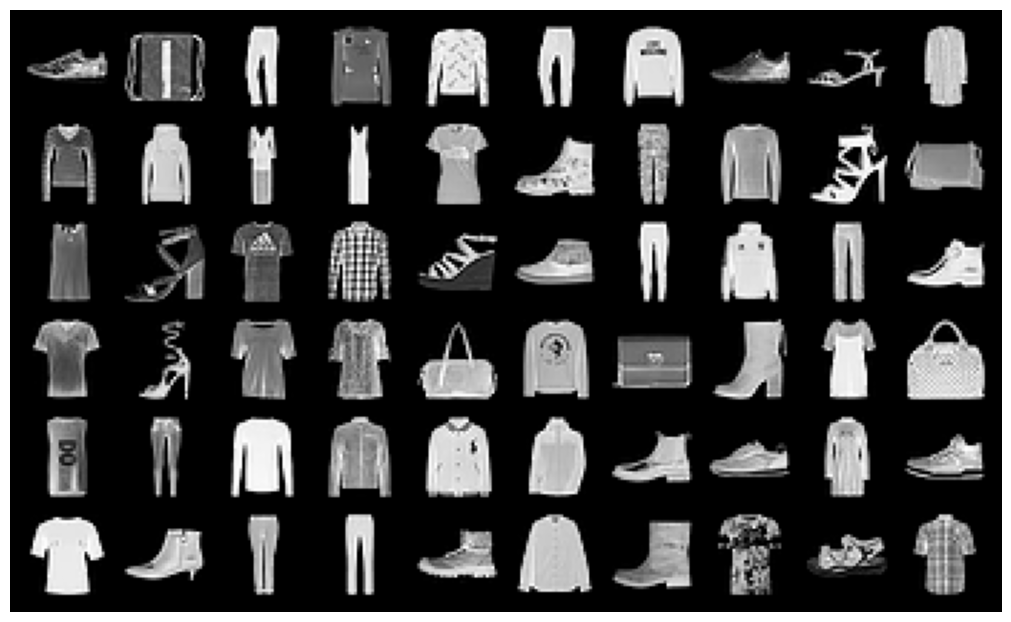

In [6]:
images_columns = 10
images_rows = 6

def show_grid(images_tensor, images_columns, images_rows):
    image = torchvision.utils.make_grid(images_tensor, images_columns, images_rows)
    image = image.numpy()
    fig = plt.gcf()
    fig.set_size_inches(plot_w, plot_h)
    plt.axis('off')
    plt.imshow(np.transpose(image, (1, 2, 0)))
    plt.show()

data_iterator = iter(train_loader)
images, labels = next(data_iterator)

show_grid(images[0:(images_columns * images_rows)], images_columns, images_rows)

## Implement a VAE neural network architecture

### Implement the network architecture

Recall that a VAE roughly consistst of two parts: The encoder (which reduces the number of dimensions and maps the input to the latent space) and the decoder (which reverses the encoding, mapping from the latent space back to the initial space).

In VAEs (compared to standard auto-encoders) we assume that the latent space is generated from a multi-variate normal distribution (N~(μ, σ²)) that is parameterized by two vectors, mean and variance. In the network, we use the log of the variance. 

In training, we sample from the distribution using the current values of the two vectors, which are updated in each step. After training, we use the mu value to draw the samples.

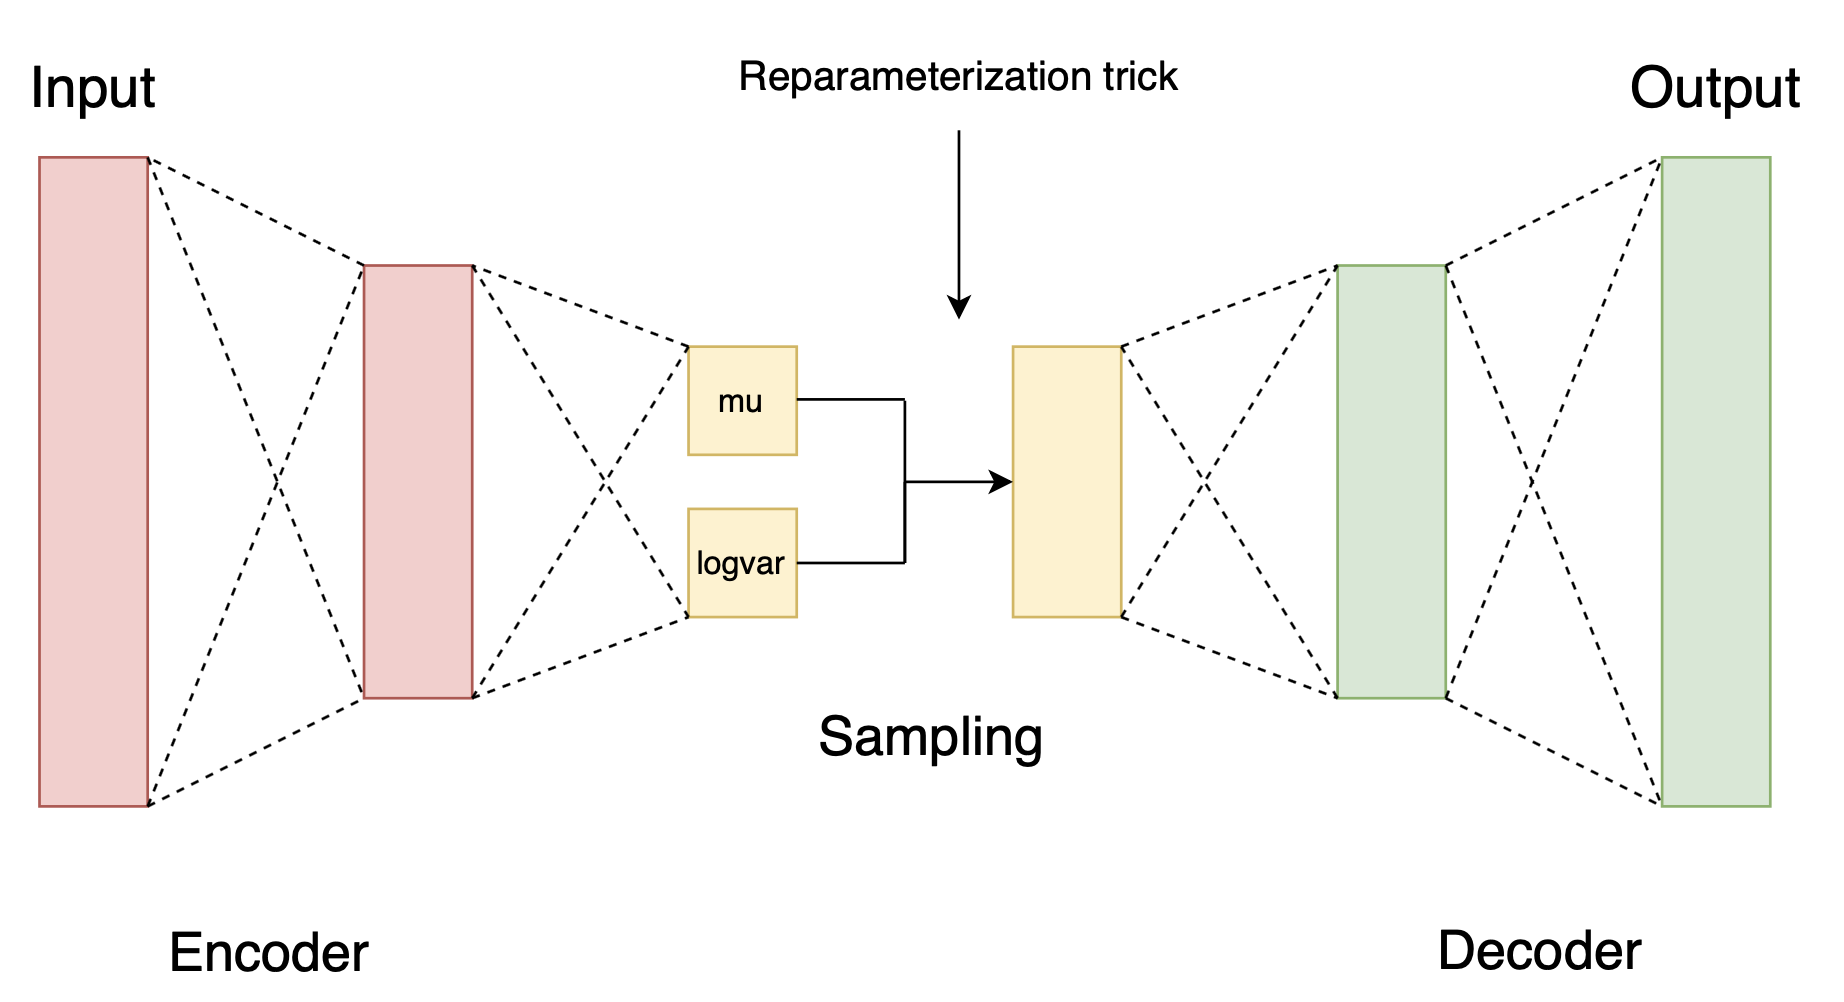

**TASK 1: Implement a VAE with the following network architecture**

We will implement a basic convolutional VAE architecture. Look at the following VAE class specification and implement it accordingly: 

**Encoder (sequential model):**
 * Convolutional Layer with (1, capacity) number of (in, out)-channels, kernel size of 4 * 4, stride of 2 and padding of 1
 * ReLU Activation Layer
 * Convolutional Layer with (capacity, 2 * capacity) number of (in, out)-channels, kernel size of 4 * 4, stride of 2 and padding of 1
 * ReLU Activation Layer
 
**Sampling:**
* mu, logvar: Linear Layer with 2 * capacity * 7 * 7 input features and latent_dims output features each 
* z: Linear Layer with latent_dims input features and 2 * capacity * 7 * 7 output features

**Decoder (sequential model):**
 * ConvTranspose2d Layer with (2 * capacity, capacity) number of (in, out)-channels, kernel size of 4 * 4, stride of 2 and padding of 1 
 * ReLU Activation Layer
 * ConvTranspose2d Layer with (capacity, 1) number of (in, out)-channels, kernel size of 4 * 4, stride of 2 and padding of 1 
 * Sigmoid Activation Layer



**Hint**

For the sampling use the reparameterization trick:

To generate x ~ N(μ, σ²), sample ε ~ N(0, 1). Then x can be computed as x = μ + σε.

Further, remember to differentiate between training and eval: sample in training and return mu in eval.

**TODO** What does the trick do and why do we need it?

- The reparameterization trick is a method used in Variational Autoencoders (VAEs) to make the sampling process differentiable. Differentiability is essential because we need to compute gradients and perform backpropagation during training.
- In a VAE, the encoder outputs two parameters: the mean (μ) and the log-variance (logσ²), which define a Gaussian distribution for the latent space.
- To sample from this distribution, we would normally draw z∼N(μ,σ)
- However, this sampling step introduces randomness, making it non-differentiable. Without differentiability, backpropagation can't compute gradients for training.
- The reparameterization trick resolves this by expressing the sampled z in a way that separates the randomness from the model parameters (mu and sigma), process:
    - sample e from standard normal
    - transform e: z=μ+σ⋅ϵ
    - Since 
𝜇
μ and 
𝜎
σ are outputs of the neural network, this transformation remains differentiable, allowing gradients to flow through the sampling step.



via capacity: 
- Encoder: Compresses the spatial dimensions while increasing the feature depth (number of channels).
- Decoder: Upsamples the spatial dimensions while reducing the feature depth.abs

via latent_dim: 
- defines the size (dimensionality) of the latent space, where the compressed representation of the input resides
- A higher latent_dims allows for a more detailed representation, enabling better reconstruction of complex inputs. However, it increases the model size and reduces generalization.
- A smaller latent_dims forces the VAE to learn a more compact and abstract representation of the data.
- The latent space is a vector of size latent_dims for each input image.
- This vector represents the compressed, high-level features of the input
- If latent_dims=10, each input is encoded into a 10-dimensional vector.
- If the batch size is 64 and latent_dims=10, the latent space has dimensions (64,10).


fc_mu and fc_logvar are fully connected layers, so feature maps from encoder need to be flattened, they both have input: Batch Size,2⋅capacity⋅7⋅7 and output: Batch Size,latent_dims

fc_mu: 
- Outputs the mean (μ) of the latent space distribution
- Computes the mean (
𝜇
μ) of the latent space distribution for each input in the batch.


fc_logvar: 
- Outputs the log-variance of the latent space distribution.
- determine the "spread" or uncertainty of the encoded data point in the latent space.



std = torch.exp(0.5 * logvar): 
- fc_logvar outputs log var, but we need sd , which is what we get with that formula


sigmoid in the end: 
The Sigmoid activation squashes the output to the range [0, 1], which matches the pixel intensity range of the input images (grayscale images are typically normalized to [0, 1]).


return x_hat, mu, logvar in forward: 
- loss function for VAE is reconstruction loss (input to output image difference) + kl divergence (how closely the latent distribution matches standard normal) -> for KL divergence we need mua and sigma, so we return them in forward function 

In [7]:
class VAE(nn.Module):
    def __init__(self, image_size=28, latent_dims=10, capacity=32):
        super(VAE, self).__init__()

        self.image_size = image_size
        self.latent_dims = latent_dims
        self.capacity = capacity

        # Encoder: Converts input images into a compressed latent representation
        self.encoder = nn.Sequential(
            nn.Conv2d(1, capacity, kernel_size=4, stride=2, padding=1),  # Input: [1, 28, 28] -> Output: [capacity, 14, 14]
            nn.ReLU(),
            nn.Conv2d(capacity, 2 * capacity, kernel_size=4, stride=2, padding=1),  # Input: [capacity, 14, 14] -> Output: [2*capacity, 7, 7]
            nn.ReLU()
        )

        # Sampling layers: Map encoded data to latent space (mu and logvar)
        self.fc_mu = nn.Linear(2 * capacity * 7 * 7, latent_dims)  # Mean of the latent distribution
        self.fc_logvar = nn.Linear(2 * capacity * 7 * 7, latent_dims)  # Log variance of the latent distribution

        # Latent to Decoder: Transform latent vector back to decoder input size
        self.fc_z = nn.Linear(latent_dims, 2 * capacity * 7 * 7)

        # Decoder: Reconstruct the input image from the latent representation
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(2 * capacity, capacity, kernel_size=4, stride=2, padding=1),  # Input: [2*capacity, 7, 7] -> Output: [capacity, 14, 14]
            nn.ReLU(),
            nn.ConvTranspose2d(capacity, 1, kernel_size=4, stride=2, padding=1),  # Input: [capacity, 14, 14] -> Output: [1, 28, 28]
            nn.Sigmoid()  # Scale output to [0, 1]
        )

    def encode(self, x):
        """
        Encodes the input image into the latent space.
        Args:
            x: Input image tensor (Batch size x 1 x 28 x 28)
        Returns:
            mu: Mean of the latent distribution
            logvar: Log variance of the latent distribution
        """
        x = self.encoder(x)  # Apply convolutional layers
        x = x.view(x.size(0), -1)  # Flatten the feature map for the fully connected layer
        mu = self.fc_mu(x)  # Compute mean of latent space
        logvar = self.fc_logvar(x)  # Compute log variance of latent space
        return mu, logvar

    def reparameterize(self, mu, logvar):
        """
        Samples from the latent space using the reparameterization trick.
        Args:
            mu: Mean of the latent distribution
            logvar: Log variance of the latent distribution
        Returns:
            z: Sampled latent vector
        """
        if self.training:
            std = torch.exp(0.5 * logvar)  # Compute standard deviation
            eps = torch.randn_like(std)  # Sample from a standard normal distribution
            return mu + eps * std  # Reparameterization: z = mu + sigma * epsilon
        else:
            return mu  # During evaluation, use the mean directly

    def decode(self, z):
        """
        Decodes the latent vector back into the image space.
        Args:
            z: Latent vector (Batch size x latent_dims)
        Returns:
            Reconstructed image tensor (Batch size x 1 x 28 x 28)
        """
        z = self.fc_z(z)  # Transform latent vector to match decoder input size
        z = z.view(-1, 2 * self.capacity, 7, 7)  # Reshape for transposed convolutions
        return self.decoder(z)  # Apply transposed convolutional layers

    def forward(self, x):
        """
        Forward pass of the VAE.
        Args:
            x: Input image tensor (Batch size x 1 x 28 x 28)
        Returns:
            x_hat: Reconstructed image
            mu: Mean of the latent distribution
            logvar: Log variance of the latent distribution
        """
        mu, logvar = self.encode(x)  # Encode input into latent space
        z = self.reparameterize(mu, logvar)  # Sample from latent space using reparameterization trick
        x_hat = self.decode(z)  # Decode latent vector back into image space
        return x_hat, mu, logvar

### Implement the loss function

Implement the two parts of the loss function: reconstruction loss using Mean Squared Error (MSE) function and the regularization part of the loss using Kullback-Leibler-Divergence (KLD).

**Hint:** 
- Make sure that you use sum instead of mean for calculating the MSE loss!
- Refer to the paper _Auto-Encoding Variational Bayes_ by Kingma and Welling to implement the loss function. 

In [8]:
def vae_loss(recon_x, x, mu, logvar):
    # Reconstruction losses are calculated using Mean Squared Error (MSE) and 
    # summed over all elements and batch
    mse_loss = torch.sum((recon_x-x)**2)

    # See Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    kld_loss = 0.5 * torch.sum(1 + logvar - mu**2 - torch.exp(logvar)) * -1

    total_loss = mse_loss + kld_loss

    return total_loss, mse_loss, kld_loss

### Instantiate the model and define the optimizer to use.

In [9]:
model = VAE(image_size=image_size,latent_dims= latent_space_dim, capacity=capacity).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss = vae_loss

In [10]:
model

VAE(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
  )
  (fc_mu): Linear(in_features=3136, out_features=10, bias=True)
  (fc_logvar): Linear(in_features=3136, out_features=10, bias=True)
  (fc_z): Linear(in_features=10, out_features=3136, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): Sigmoid()
  )
)

## Train the network

**TASK 2: Train the model and plot train+test set loss over training in the same plot using the given `plot_losses` function**


In [11]:
def plot_losses(
    train_total_losses=None, train_mse_losses=None, train_kld_losses=None, 
    test_epoch_total_losses=None, test_epoch_mse_losses=None, test_epoch_kld_losses=None
):
    x = range(1, len(train_total_losses) + 1)
    train_batches = len(train_loader)

    # set line colors
    train_color_mse   = 'moccasin'
    train_color_kld   = 'skyblue'
    train_color_total = 'palegreen'

    test_color_mse   = 'orange'
    test_color_kld   = 'blue'
    test_color_total = 'green'

    # create figure
    fig, ax1 = plt.subplots()
    fig.set_size_inches(plot_w+2, plot_h)

    # Create total / mse loss axis
    ax1.set_xlabel("Batches (Epoch)")
    ax1.set_ylabel("Total / MSE loss")
    ax1.grid(visible=True, axis='x', linestyle=':')
    ax1.set_xticks(np.arange(0, epochs * train_batches, train_batches))
    labels = [f'{str(item)} ({index})' for index, item in enumerate(ax1.get_xticks().tolist())]
    ax1.set_xticklabels(labels)

    # Plot train-set losses
    ax1.plot(x, train_mse_losses, label="Train reconstruction loss (MSE)", color=train_color_mse)
    ax1.plot(np.nan, label = 'Train regularization loss (KLD)', color=train_color_kld) # add legend entry for KLD
    ax1.plot(x, train_total_losses, label="Train total loss", color=train_color_total)

    # Compute test-set epoch average losses
    test_total_losses=[]; test_mse_losses=[]; test_kld_losses=[]
    for epoch in range(epochs):
        test_total_losses += [test_epoch_total_losses[epoch] for i in range(train_batches)]
        test_mse_losses   += [test_epoch_mse_losses[epoch] for i in range(train_batches)]
        test_kld_losses   += [test_epoch_kld_losses[epoch] for i in range(train_batches)]

    # Plot test-set losses
    ax1.plot(x, test_mse_losses, label="Test reconstruction loss (MSE)", color=test_color_mse)
    ax1.plot(np.nan, label = 'Test regularization loss (KLD)', color=test_color_kld) # add legend entry for KLD
    ax1.plot(x, test_total_losses, label="Test total loss", color=test_color_total)


    # Create kld loss twin axis
    ax2 = ax1.twinx()
    ax2.set_ylabel("KLD loss")
    ax2.plot(x, train_kld_losses, label="Train regularization loss (KLD)", color=train_color_kld)
    ax2.plot(x, test_kld_losses, label="Test regularization loss (KLD)", color=test_color_kld)

    ax1.legend(loc='center right', framealpha=1, bbox_to_anchor=(1.3, 0.5))

    fig.tight_layout() 
    plt.show()

In [12]:
# Exponential averaging for smoother loss visualization
def exp_average(prev_value, current_value, history):
    """
    Applies exponential averaging to smooth out loss visualization.
    """
    current_value /= batch_size  # Normalize loss to per-sample
    if prev_value is None:
        smoothed_value = current_value
    else:
        smoothed_value = exp_average_factor * prev_value + (1 - exp_average_factor) * current_value
    
    history.append(smoothed_value)  # Track the smoothed loss
    return smoothed_value


def train(model, optimizer, epoch, total_losses, mse_losses, kld_losses):
    """
    Trains the VAE for one epoch and logs training loss components.
    """
    model.train()  # Set model to training mode
    running_loss = 0  # To track cumulative loss across batches

    # Initialize previous smoothed losses for exponential averaging
    prev_total_loss, prev_mse_loss, prev_kld_loss = (None, None, None)
    if total_losses:
        prev_total_loss = total_losses[-1]
        prev_mse_loss = mse_losses[-1]
        prev_kld_loss = kld_losses[-1]

    # Iterate over training batches
    for batch_idx, (images_batch, _) in enumerate(train_loader):
        images_batch = images_batch.to(device)  # Move data to the computation device

        # Forward pass: Reconstruct images and compute latent space
        reconstructed_batch, mu, logvar = model(images_batch)

        # Compute loss components
        total_loss, mse_loss, kld_loss = vae_loss(reconstructed_batch, images_batch, mu, logvar)

        # Backpropagation
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += total_loss.item()

        # Smooth the losses with exponential averaging
        prev_total_loss = exp_average(prev_total_loss, total_loss.item(), total_losses)
        prev_mse_loss = exp_average(prev_mse_loss, mse_loss.item(), mse_losses)
        prev_kld_loss = exp_average(prev_kld_loss, kld_loss.item(), kld_losses)

        # Log progress differently for originality
        if batch_idx % log_interval == 0:
            print(f"Epoch {epoch} | Batch {batch_idx}/{len(train_loader)}")
            print(f"  Total Loss: {prev_total_loss:.4f}")
            print(f"  Reconstruction Loss (MSE): {prev_mse_loss:.4f}")
            print(f"  Regularization Loss (KLD): {prev_kld_loss:.4f}\n")

    # Log average loss for the epoch
    print(f"Epoch {epoch} Summary: Average Total Loss: {running_loss / len(train_loader):.4f}")


def test(model, epoch, total_losses, mse_losses, kld_losses):
    """
    Tests the VAE on the validation set and logs average test losses.
    """
    model.eval()  # Set model to evaluation mode
    epoch_total_loss, epoch_mse_loss, epoch_kld_loss = (0, 0, 0)

    with torch.no_grad():  # Disable gradient computation for testing
        for images_batch, _ in test_loader:
            images_batch = images_batch.to(device)  # Move data to the computation device

            # Forward pass
            reconstructed_batch, mu, logvar = model(images_batch)

            # Compute loss components
            total_loss, mse_loss, kld_loss = vae_loss(reconstructed_batch, images_batch, mu, logvar)

            # Accumulate losses
            epoch_total_loss += total_loss.item()
            epoch_mse_loss += mse_loss.item()
            epoch_kld_loss += kld_loss.item()

    # Compute average losses for the epoch
    total_losses.append(epoch_total_loss / len(test_loader.dataset))
    mse_losses.append(epoch_mse_loss / len(test_loader.dataset))
    kld_losses.append(epoch_kld_loss / len(test_loader.dataset))

    # Log epoch summary
    print(f"Validation | Epoch {epoch} Results:")
    print(f"  Average Total Loss: {total_losses[-1]:.4f}")
    print(f"  Reconstruction Loss (MSE): {mse_losses[-1]:.4f}")
    print(f"  Regularization Loss (KLD): {kld_losses[-1]:.4f}\n")

In [13]:
# Initialize lists to track training and validation losses
train_total_losses = []
train_mse_losses = []
train_kld_losses = []
test_epoch_total_losses = []
test_epoch_mse_losses = []
test_epoch_kld_losses = []

# Training loop
for epoch in range(1, epochs + 1):
    print(f"Starting Epoch {epoch}...\n{'-' * 40}")
    train(model, optimizer, epoch, train_total_losses, train_mse_losses, train_kld_losses)
    test(model, epoch, test_epoch_total_losses, test_epoch_mse_losses, test_epoch_kld_losses)


Starting Epoch 1...
----------------------------------------
Epoch 1 | Batch 0/469
  Total Loss: 146.7024
  Reconstruction Loss (MSE): 146.6818
  Regularization Loss (KLD): 0.0206

Epoch 1 | Batch 100/469
  Total Loss: 38.7633
  Reconstruction Loss (MSE): 29.5986
  Regularization Loss (KLD): 9.1648

Epoch 1 | Batch 200/469
  Total Loss: 33.2177
  Reconstruction Loss (MSE): 24.1435
  Regularization Loss (KLD): 9.0743

Epoch 1 | Batch 300/469
  Total Loss: 31.0923
  Reconstruction Loss (MSE): 22.2578
  Regularization Loss (KLD): 8.8345

Epoch 1 | Batch 400/469
  Total Loss: 29.6113
  Reconstruction Loss (MSE): 20.8294
  Regularization Loss (KLD): 8.7818

Epoch 1 Summary: Average Total Loss: 4880.5427
Validation | Epoch 1 Results:
  Average Total Loss: 25.6710
  Reconstruction Loss (MSE): 16.9646
  Regularization Loss (KLD): 8.7065

Starting Epoch 2...
----------------------------------------
Epoch 2 | Batch 0/469
  Total Loss: 28.4929
  Reconstruction Loss (MSE): 20.1017
  Regularization

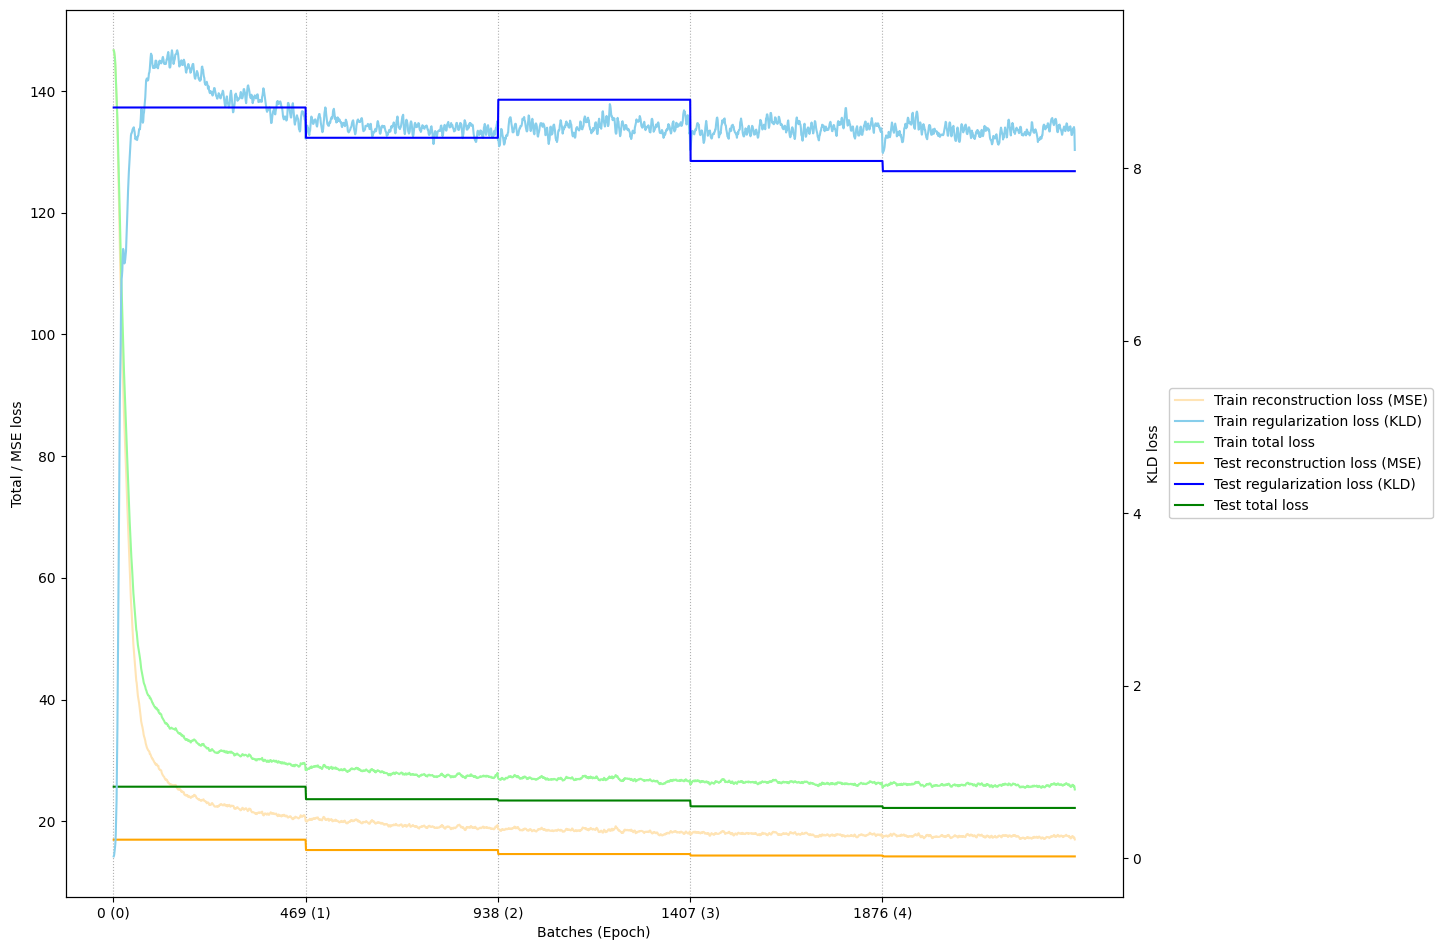

In [14]:
# Plot the losses after training
plot_losses(
    train_total_losses=train_total_losses,
    train_mse_losses=train_mse_losses,
    train_kld_losses=train_kld_losses,
    test_epoch_total_losses=test_epoch_total_losses,
    test_epoch_mse_losses=test_epoch_mse_losses,
    test_epoch_kld_losses=test_epoch_kld_losses
)

### Visualization of random samples from the latent space via decoding

Here we just create a number of random samples from the latent space and use the decoder to generate images from them. Rerun the code cell to generate new samples every time!

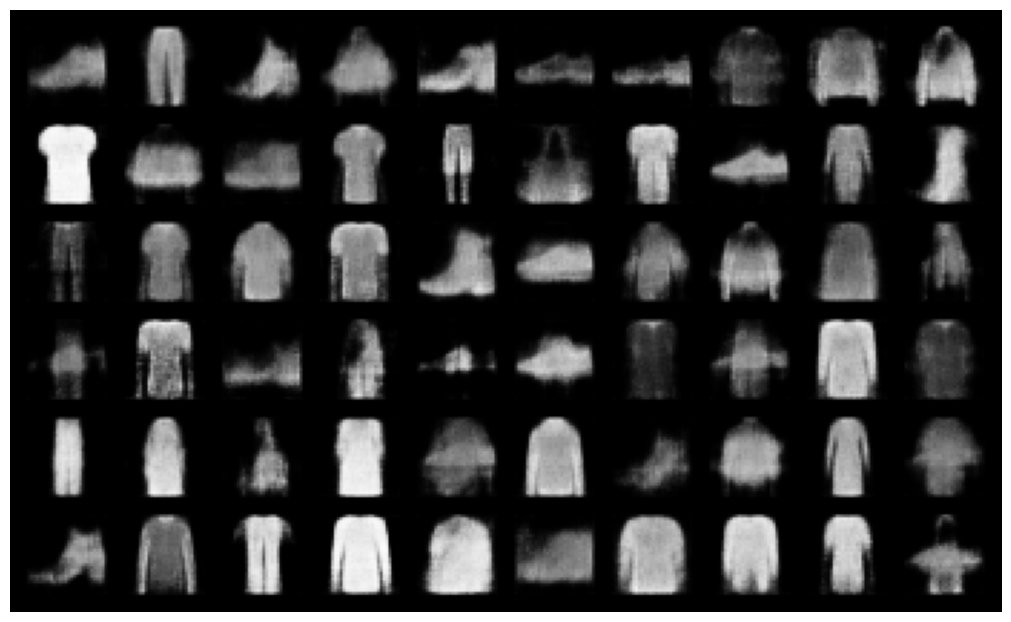

In [15]:
with torch.no_grad():
    samples = torch.randn(images_columns * images_rows, latent_space_dim).to(device)
    samples = model.decode(samples).cpu()

    show_grid(samples[0:(images_columns * images_rows)], images_columns, images_rows)

### Visualization of image reconstructions

Visualize the image reconstruction process and compare the reconstructions to the original images.

Original Images


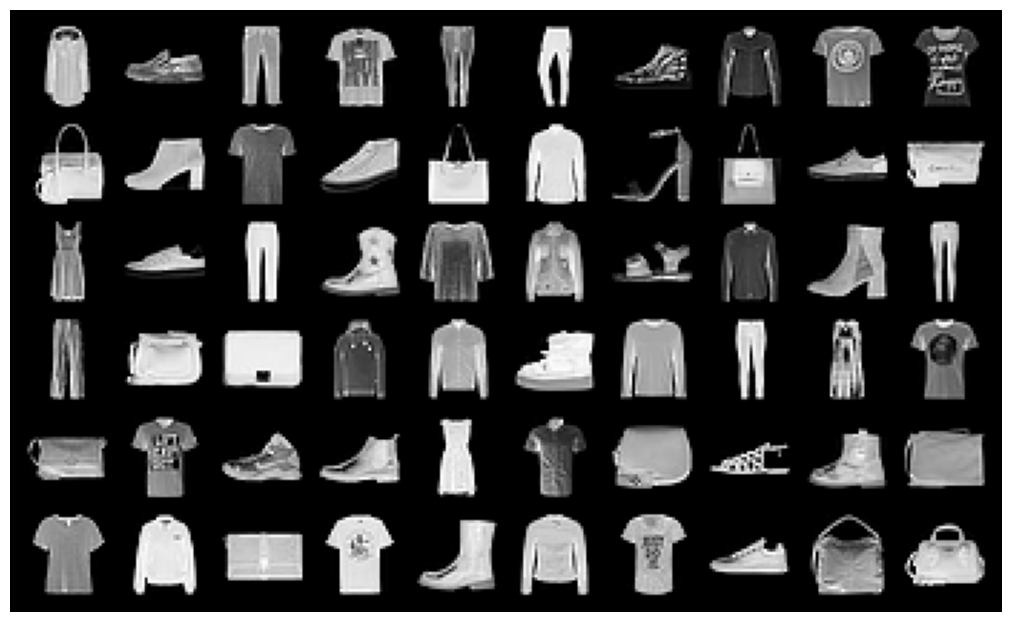

Reconstructed Images


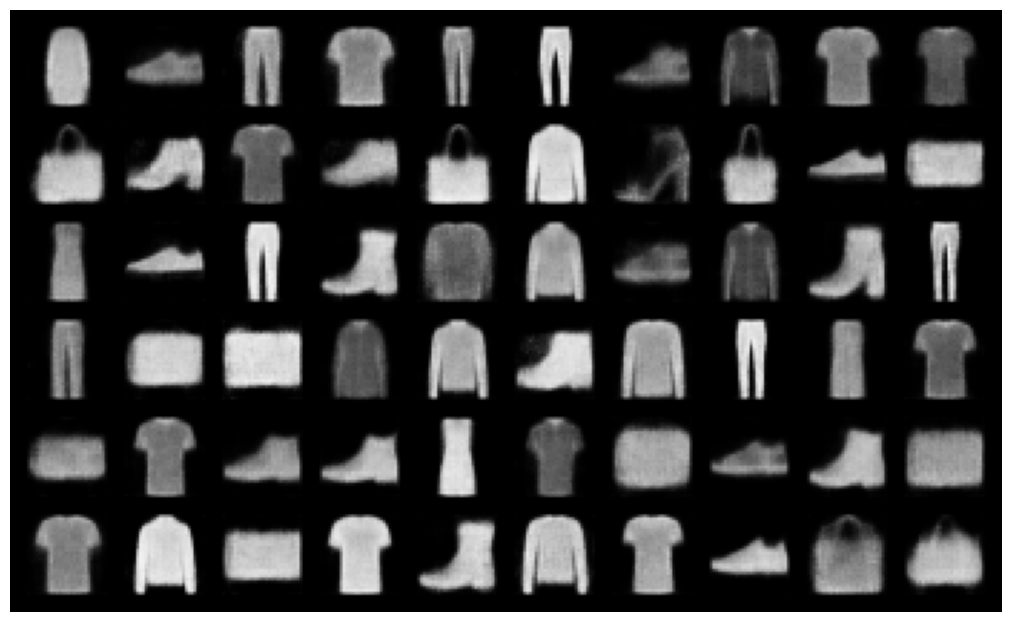

In [17]:
images_columns = 10
images_rows    = 6

data_iterator = iter(train_loader)
images, labels = next(data_iterator)

# Show original images
print("Original Images")
show_grid(images[0:(images_columns * images_rows)], images_columns, images_rows)

# Show reconstructed images
model.eval()
with torch.no_grad():

    # TODO: compute reconstruction
    images_recon,mean,logvar = model(images.to(device))
    images_recon = images_recon.cpu()
    print("Reconstructed Images")
    show_grid(images_recon[0:(images_columns * images_rows)], images_columns, images_rows)

### Optimization

**TASK 3: Explore dimensionality of latent space**

How does the dimensionality of latent space (set to 10 by default in our case) affect loss and quality of the reconstructions? Explore smaller and larger latent dimensionality by using 2, 4, 8, 16, 32 dimensions and looking at reconstructions and resulting test set losses. 


--- Training with latent_dim = 2 ---
Epoch 1 | Batch 0/469
  Total Loss: 133.2125
  Reconstruction Loss (MSE): 133.2050
  Regularization Loss (KLD): 0.0076

Epoch 1 | Batch 100/469
  Total Loss: 44.1979
  Reconstruction Loss (MSE): 39.6889
  Regularization Loss (KLD): 4.5089

Epoch 1 | Batch 200/469
  Total Loss: 37.4670
  Reconstruction Loss (MSE): 33.3126
  Regularization Loss (KLD): 4.1544

Epoch 1 | Batch 300/469
  Total Loss: 35.4712
  Reconstruction Loss (MSE): 31.2721
  Regularization Loss (KLD): 4.1992

Epoch 1 | Batch 400/469
  Total Loss: 34.2089
  Reconstruction Loss (MSE): 29.9398
  Regularization Loss (KLD): 4.2691

Epoch 1 Summary: Average Total Loss: 5414.5451
Validation | Epoch 1 Results:
  Average Total Loss: 32.0047
  Reconstruction Loss (MSE): 27.8974
  Regularization Loss (KLD): 4.1073

Epoch 2 | Batch 0/469
  Total Loss: 32.4534
  Reconstruction Loss (MSE): 28.3829
  Regularization Loss (KLD): 4.0705

Epoch 2 | Batch 100/469
  Total Loss: 32.6175
  Reconstruction 

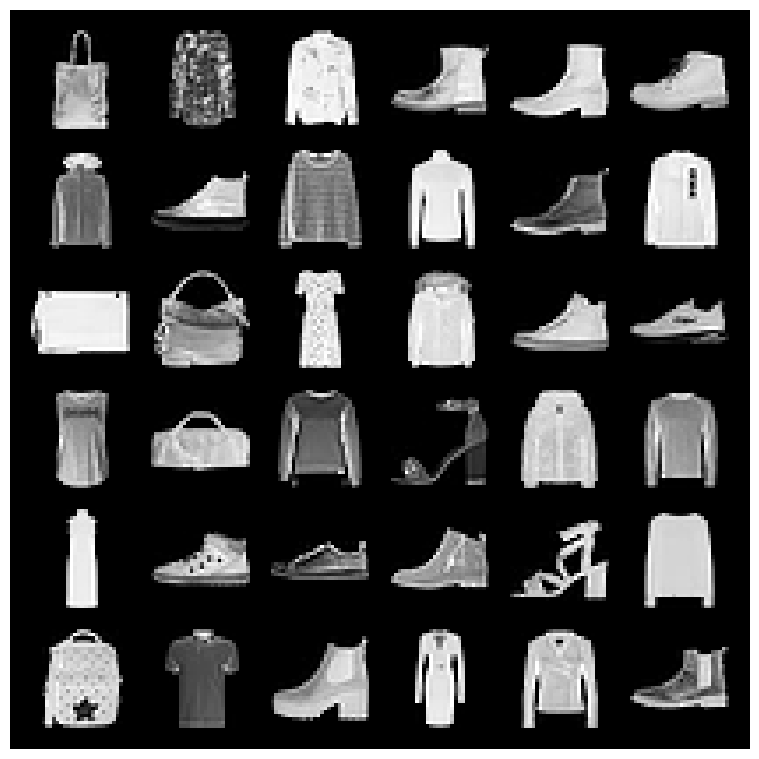

Displaying reconstructed images for latent_dim=2


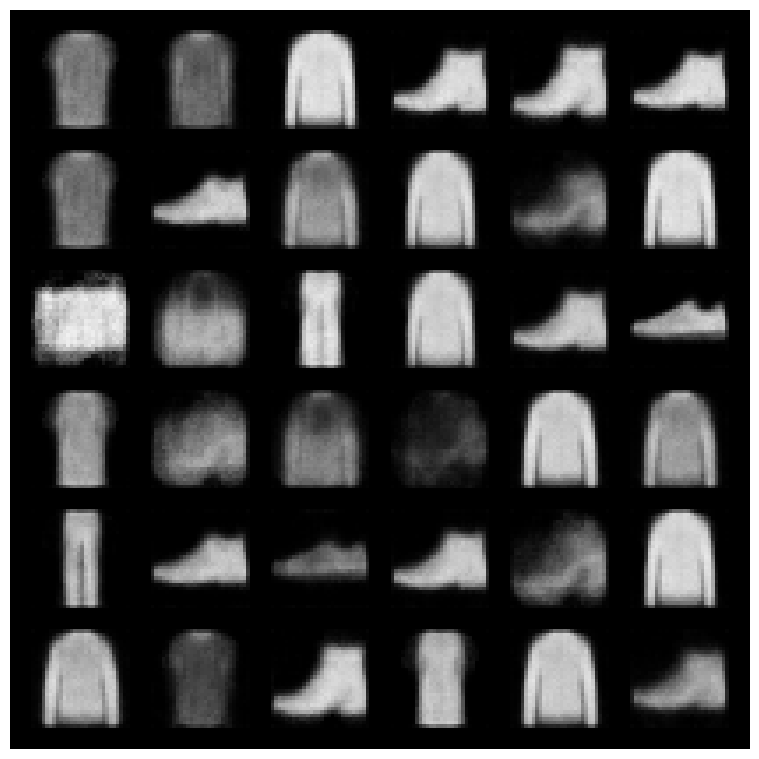

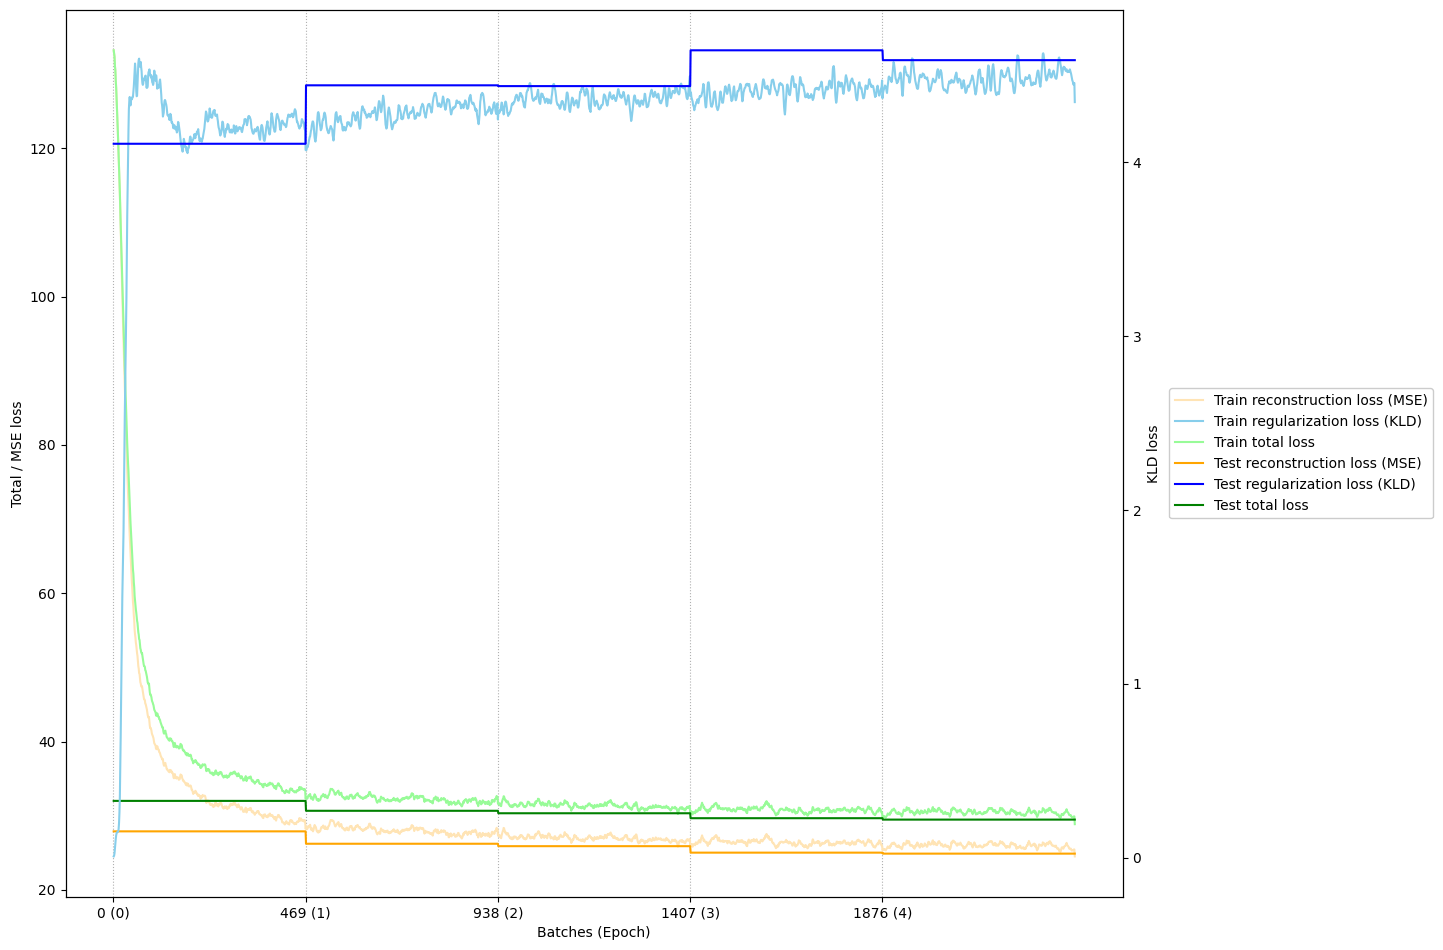


--- Training with latent_dim = 4 ---
Epoch 1 | Batch 0/469
  Total Loss: 155.1517
  Reconstruction Loss (MSE): 155.1469
  Regularization Loss (KLD): 0.0048

Epoch 1 | Batch 100/469
  Total Loss: 38.8456
  Reconstruction Loss (MSE): 32.1119
  Regularization Loss (KLD): 6.7337

Epoch 1 | Batch 200/469
  Total Loss: 33.6963
  Reconstruction Loss (MSE): 26.8256
  Regularization Loss (KLD): 6.8707

Epoch 1 | Batch 300/469
  Total Loss: 30.9611
  Reconstruction Loss (MSE): 24.1626
  Regularization Loss (KLD): 6.7985

Epoch 1 | Batch 400/469
  Total Loss: 29.6324
  Reconstruction Loss (MSE): 23.0669
  Regularization Loss (KLD): 6.5655

Epoch 1 Summary: Average Total Loss: 4881.1854
Validation | Epoch 1 Results:
  Average Total Loss: 27.3006
  Reconstruction Loss (MSE): 20.5569
  Regularization Loss (KLD): 6.7437

Epoch 2 | Batch 0/469
  Total Loss: 29.0677
  Reconstruction Loss (MSE): 22.6560
  Regularization Loss (KLD): 6.4117

Epoch 2 | Batch 100/469
  Total Loss: 28.5648
  Reconstruction 

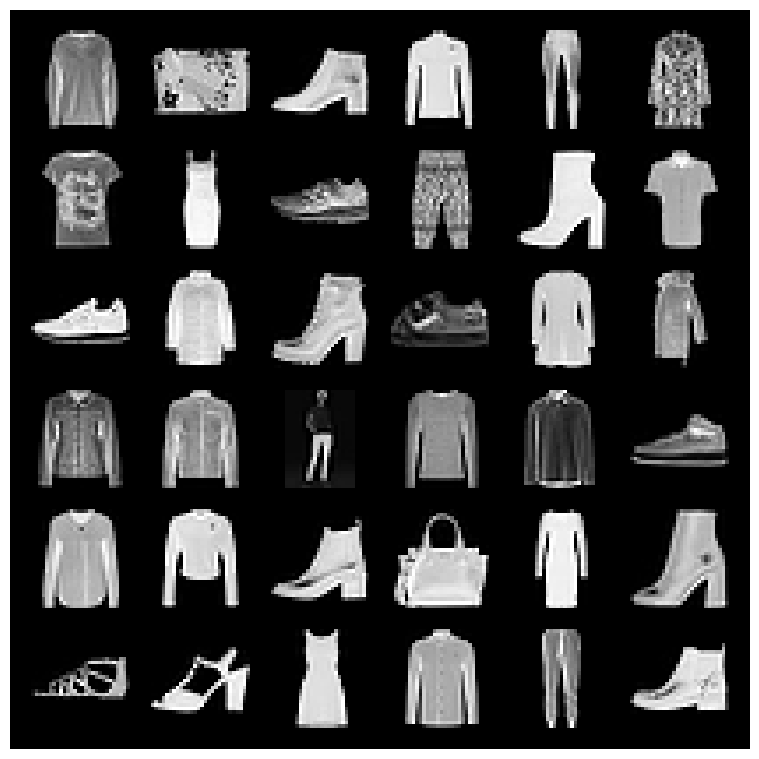

Displaying reconstructed images for latent_dim=4


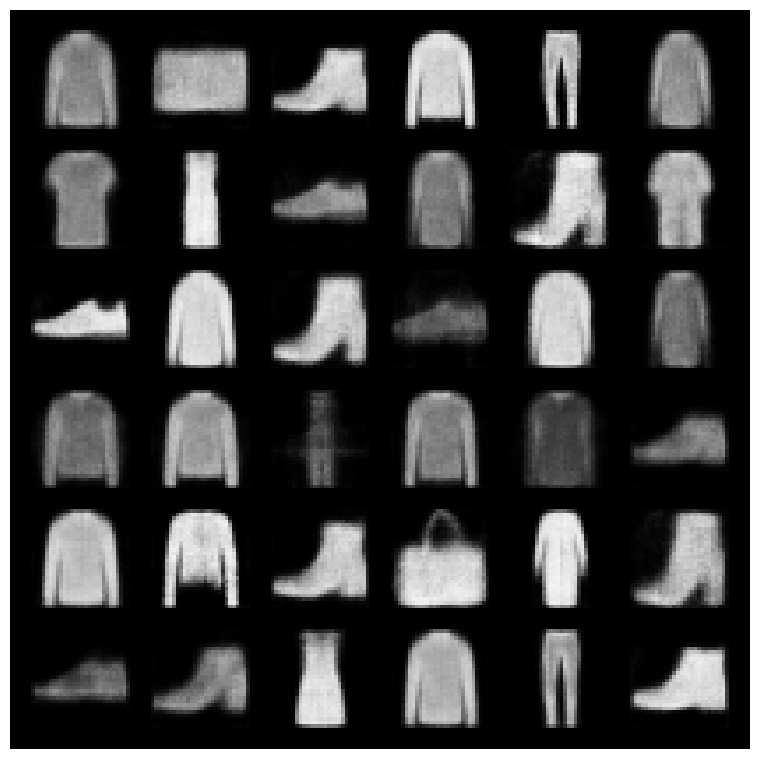

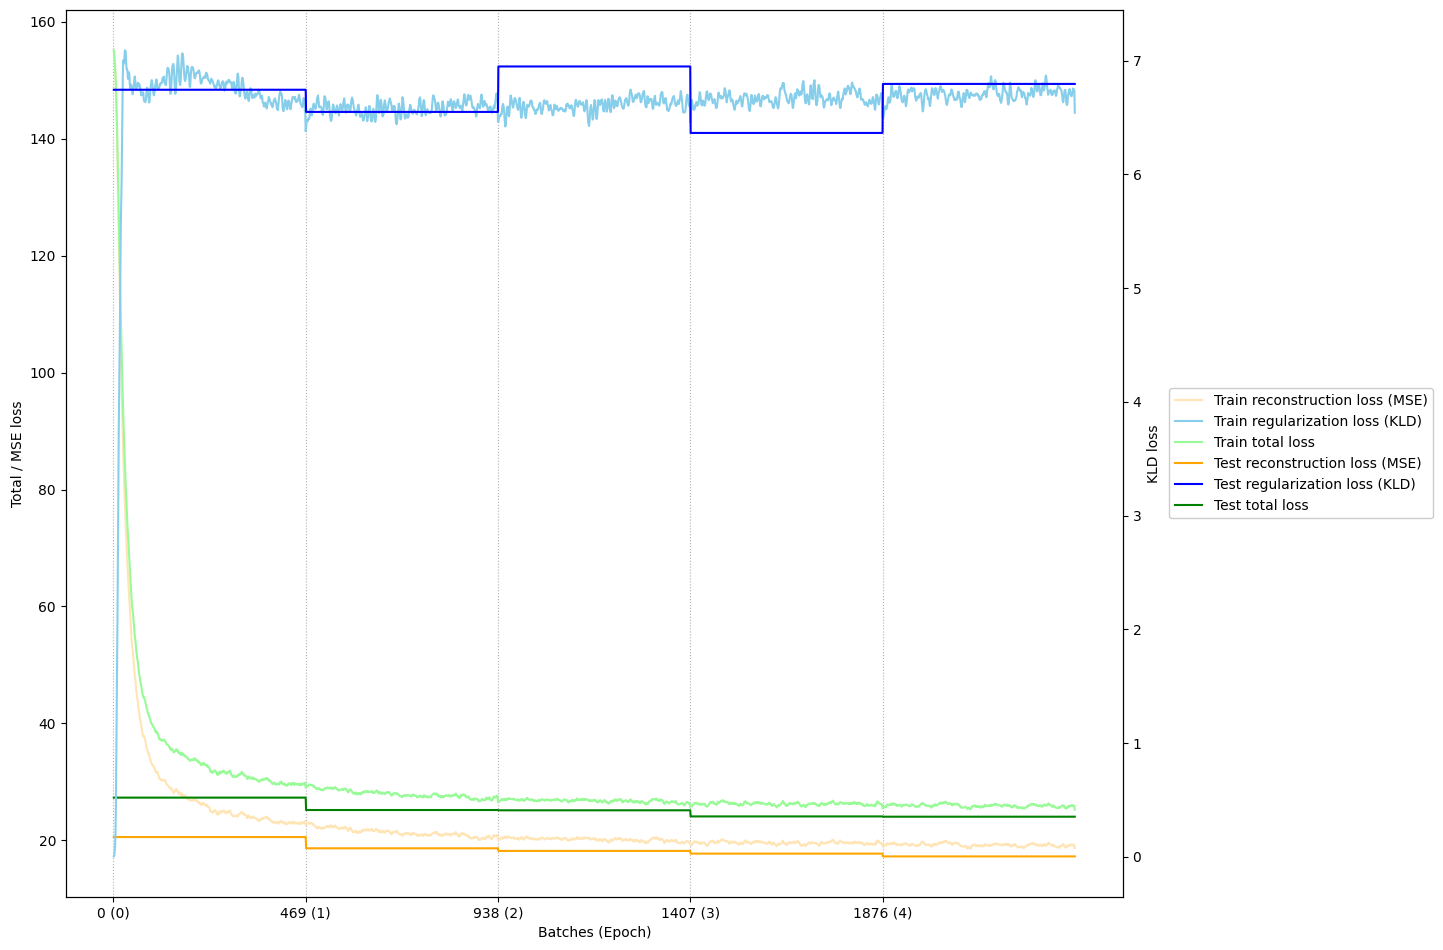


--- Training with latent_dim = 8 ---
Epoch 1 | Batch 0/469
  Total Loss: 135.5237
  Reconstruction Loss (MSE): 135.4987
  Regularization Loss (KLD): 0.0250

Epoch 1 | Batch 100/469
  Total Loss: 38.9499
  Reconstruction Loss (MSE): 30.3939
  Regularization Loss (KLD): 8.5560

Epoch 1 | Batch 200/469
  Total Loss: 32.4919
  Reconstruction Loss (MSE): 23.8828
  Regularization Loss (KLD): 8.6091

Epoch 1 | Batch 300/469
  Total Loss: 30.3763
  Reconstruction Loss (MSE): 21.8715
  Regularization Loss (KLD): 8.5048

Epoch 1 | Batch 400/469
  Total Loss: 29.2047
  Reconstruction Loss (MSE): 20.7920
  Regularization Loss (KLD): 8.4127

Epoch 1 Summary: Average Total Loss: 4833.4131
Validation | Epoch 1 Results:
  Average Total Loss: 25.5328
  Reconstruction Loss (MSE): 17.2567
  Regularization Loss (KLD): 8.2761

Epoch 2 | Batch 0/469
  Total Loss: 28.0188
  Reconstruction Loss (MSE): 20.0136
  Regularization Loss (KLD): 8.0052

Epoch 2 | Batch 100/469
  Total Loss: 28.2259
  Reconstruction 

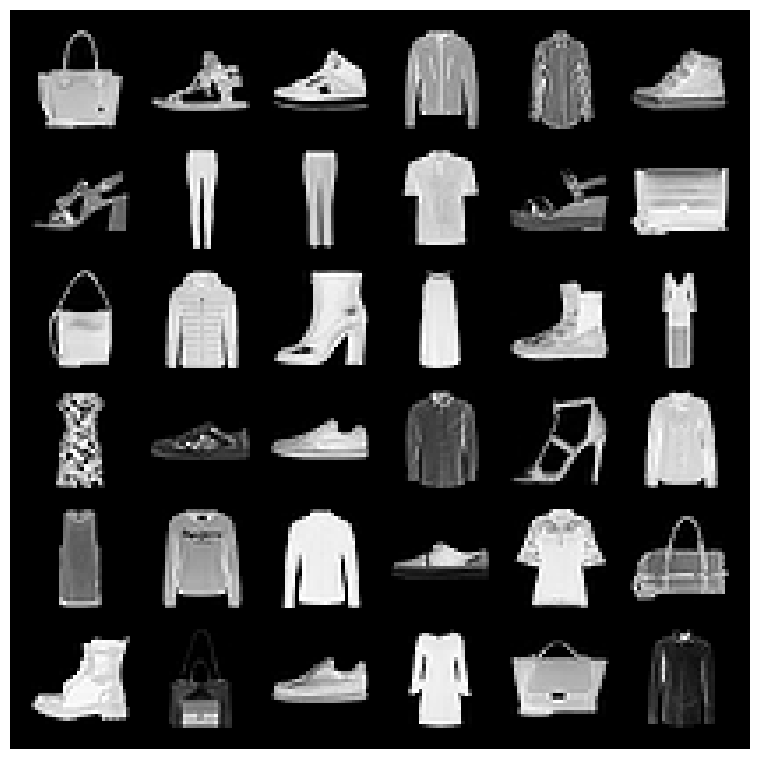

Displaying reconstructed images for latent_dim=8


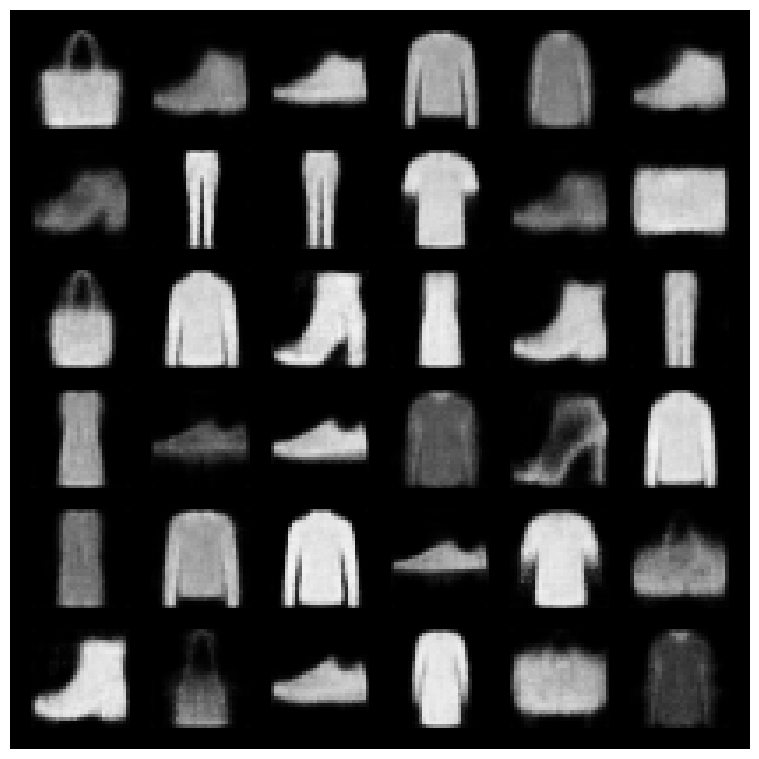

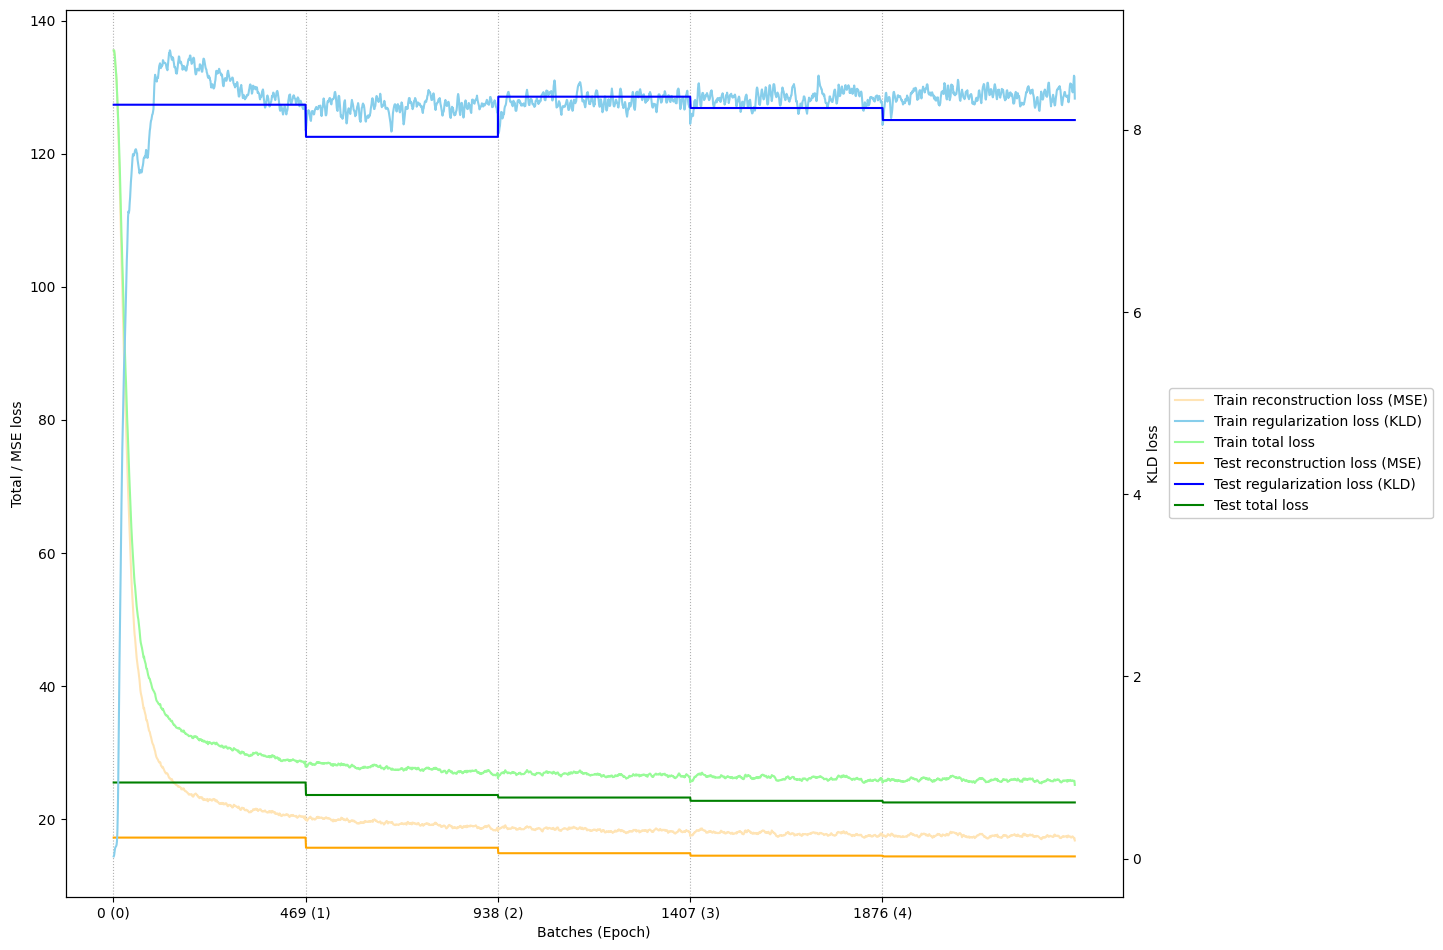


--- Training with latent_dim = 16 ---
Epoch 1 | Batch 0/469
  Total Loss: 116.9582
  Reconstruction Loss (MSE): 116.9210
  Regularization Loss (KLD): 0.0372

Epoch 1 | Batch 100/469
  Total Loss: 39.0332
  Reconstruction Loss (MSE): 29.4448
  Regularization Loss (KLD): 9.5884

Epoch 1 | Batch 200/469
  Total Loss: 34.0069
  Reconstruction Loss (MSE): 24.8934
  Regularization Loss (KLD): 9.1135

Epoch 1 | Batch 300/469
  Total Loss: 31.0272
  Reconstruction Loss (MSE): 22.2158
  Regularization Loss (KLD): 8.8114

Epoch 1 | Batch 400/469
  Total Loss: 30.0216
  Reconstruction Loss (MSE): 21.2983
  Regularization Loss (KLD): 8.7233

Epoch 1 Summary: Average Total Loss: 4762.4447
Validation | Epoch 1 Results:
  Average Total Loss: 25.0546
  Reconstruction Loss (MSE): 16.4711
  Regularization Loss (KLD): 8.5835

Epoch 2 | Batch 0/469
  Total Loss: 28.5226
  Reconstruction Loss (MSE): 20.1141
  Regularization Loss (KLD): 8.4084

Epoch 2 | Batch 100/469
  Total Loss: 28.8417
  Reconstruction

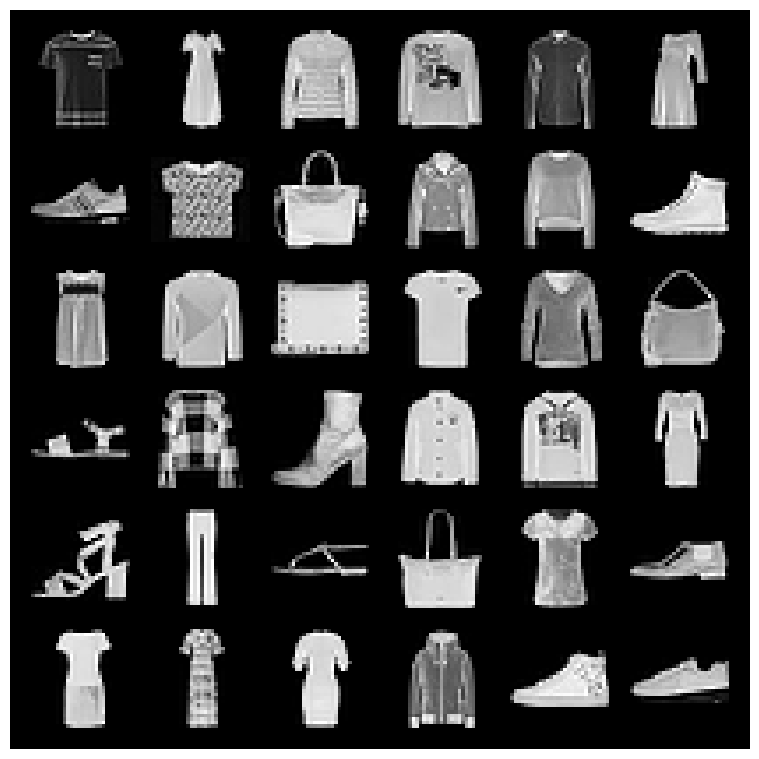

Displaying reconstructed images for latent_dim=16


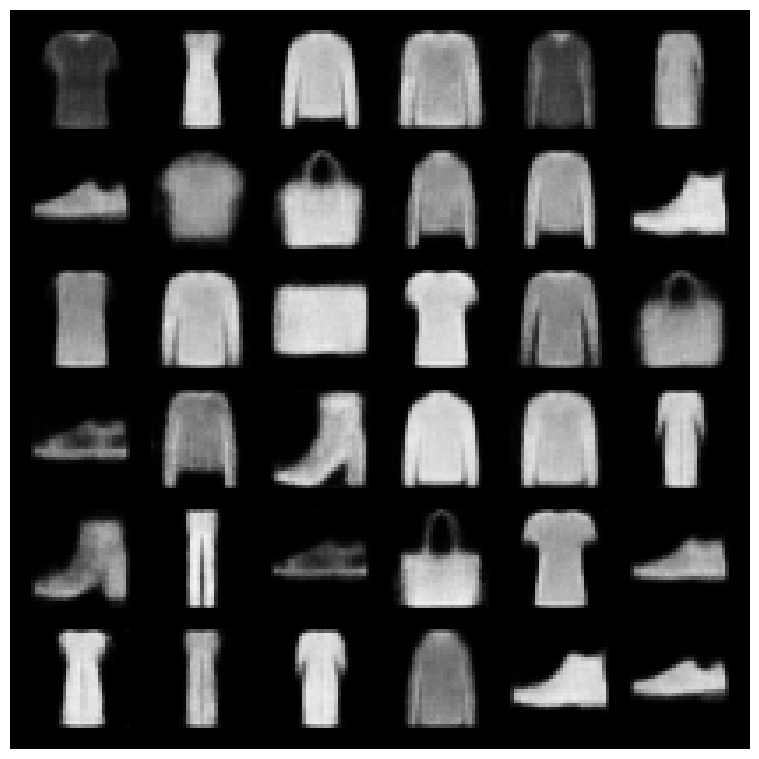

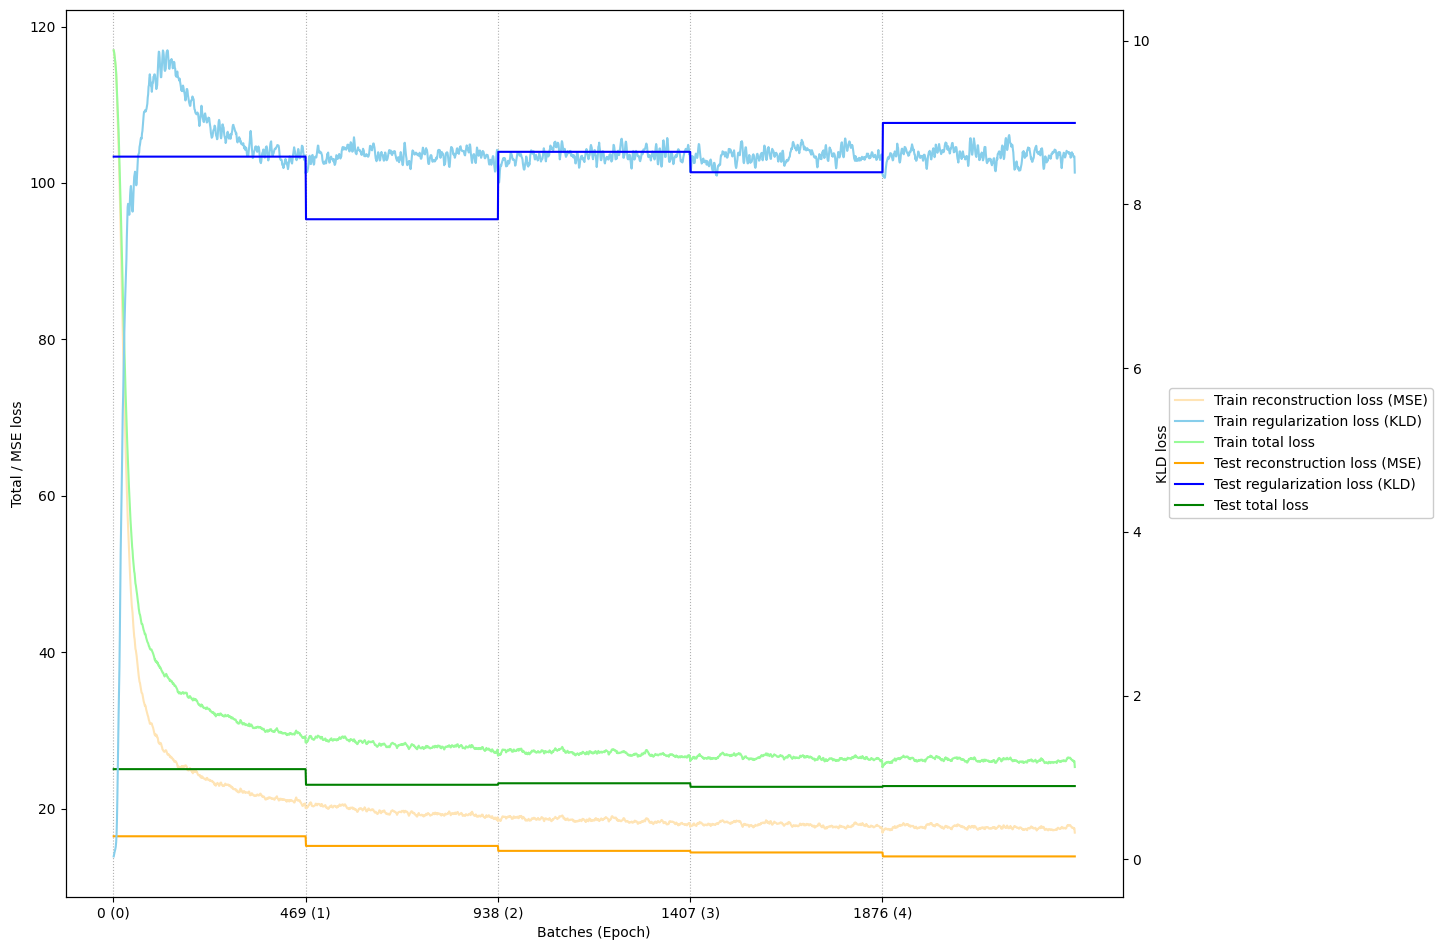


--- Training with latent_dim = 32 ---
Epoch 1 | Batch 0/469
  Total Loss: 132.5191
  Reconstruction Loss (MSE): 132.4531
  Regularization Loss (KLD): 0.0660

Epoch 1 | Batch 100/469
  Total Loss: 42.1404
  Reconstruction Loss (MSE): 31.6820
  Regularization Loss (KLD): 10.4584

Epoch 1 | Batch 200/469
  Total Loss: 35.6435
  Reconstruction Loss (MSE): 25.8541
  Regularization Loss (KLD): 9.7894

Epoch 1 | Batch 300/469
  Total Loss: 32.2511
  Reconstruction Loss (MSE): 22.9580
  Regularization Loss (KLD): 9.2931

Epoch 1 | Batch 400/469
  Total Loss: 30.1676
  Reconstruction Loss (MSE): 21.6089
  Regularization Loss (KLD): 8.5587

Epoch 1 Summary: Average Total Loss: 4988.4710
Validation | Epoch 1 Results:
  Average Total Loss: 25.3478
  Reconstruction Loss (MSE): 16.9530
  Regularization Loss (KLD): 8.3948

Epoch 2 | Batch 0/469
  Total Loss: 28.7921
  Reconstruction Loss (MSE): 20.4975
  Regularization Loss (KLD): 8.2947

Epoch 2 | Batch 100/469
  Total Loss: 28.8976
  Reconstructio

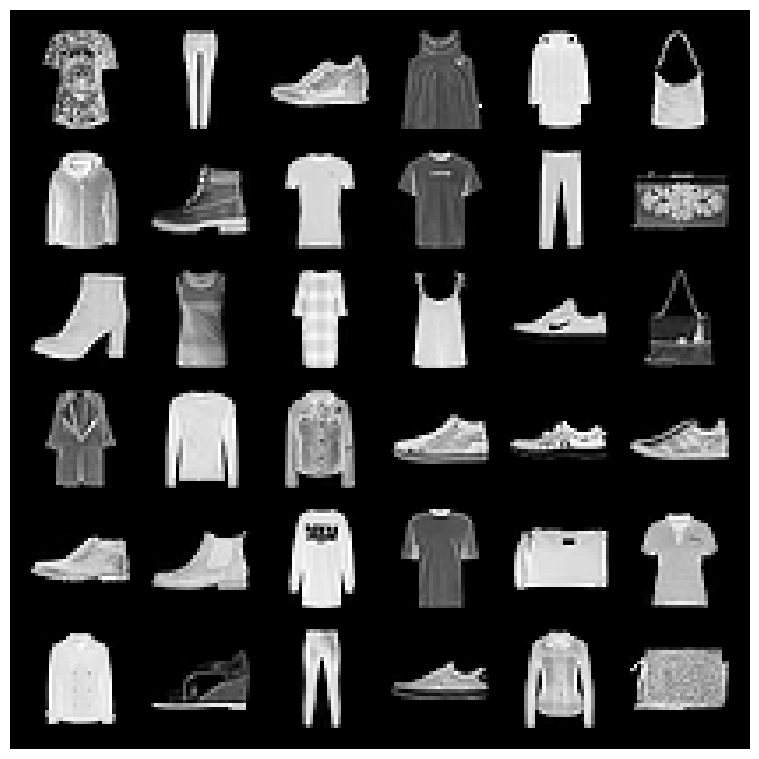

Displaying reconstructed images for latent_dim=32


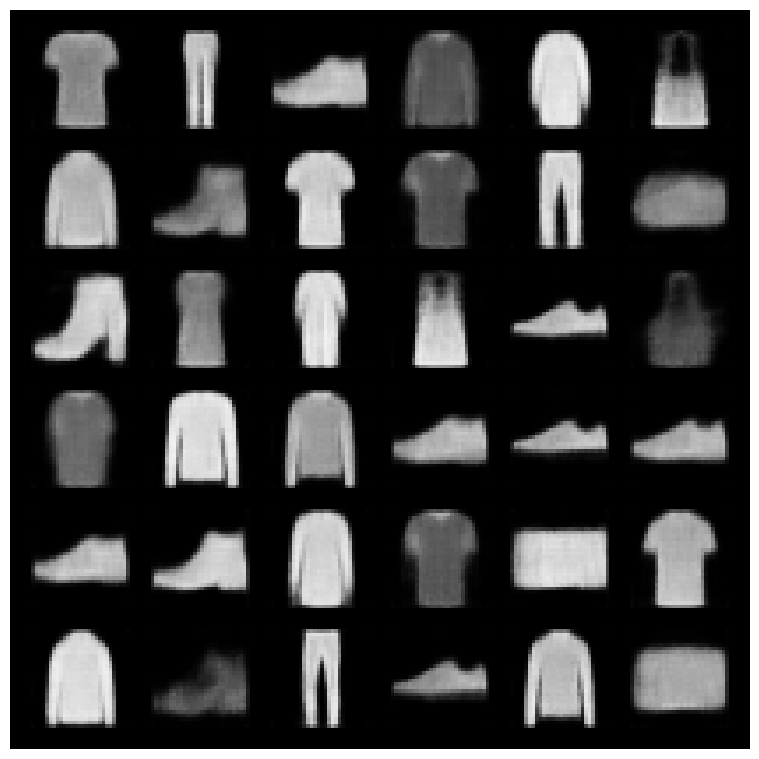

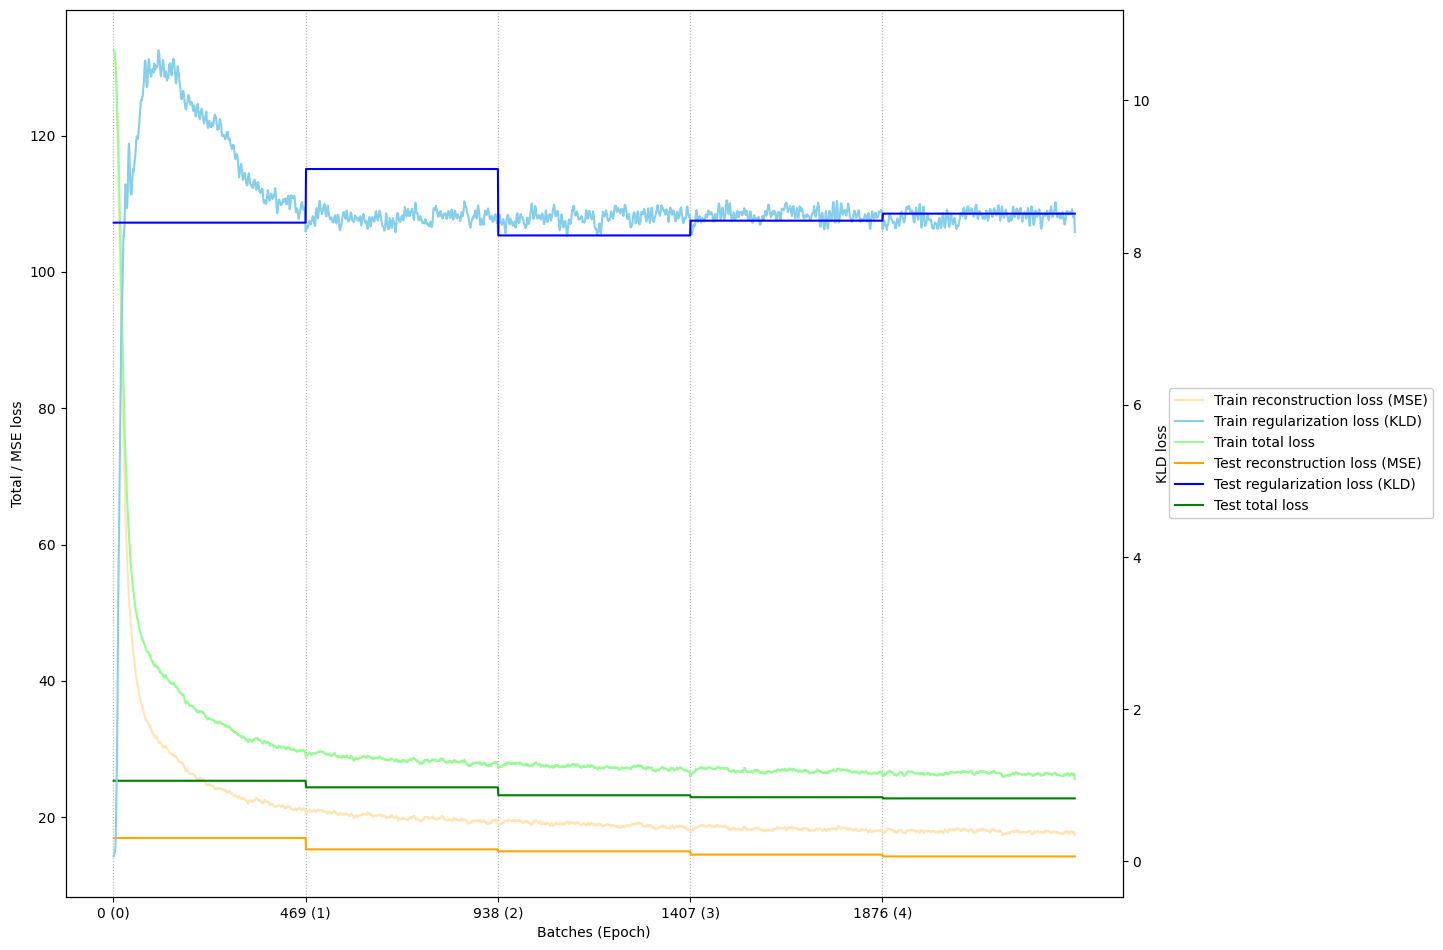

In [19]:
latent_dimensions = [2, 4, 8, 16, 32]

for latent_space_dim in latent_dimensions:
    print(f"\n--- Training with latent_dim = {latent_space_dim} ---")

    # Initialize model & optimizer for this latent dimension
    model = VAE(image_size=image_size, latent_dims=latent_space_dim, capacity=capacity).to(device)
    optimizer_current_dim = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

    # Initialize lists to track training and validation losses
    train_total_losses = []
    train_mse_losses   = []
    train_kld_losses   = []
    test_total_losses  = []
    test_mse_losses    = []
    test_kld_losses    = []

    # Train & validate for the specified number of epochs
    for epoch in range(1, epochs + 1):
        train(model, optimizer_current_dim, epoch, 
              train_total_losses, train_mse_losses, train_kld_losses)
        test(model, epoch, 
             test_total_losses, test_mse_losses, test_kld_losses)

    # Fetch a batch of images to visualize (original vs. reconstructed)
    data_iterator = iter(train_loader)
    sample_images, _ = next(data_iterator)

    # Show some original images
    print(f"Displaying original images for latent_dim={latent_space_dim}")
    show_grid(sample_images[0: (images_columns * images_rows)], 
              images_columns, images_rows)

    # Reconstruct images with the current model
    model.eval()  # inference mode
    with torch.no_grad():
        sample_images_gpu = sample_images.to(device)
        reconstructed_batch, _, _ = model(sample_images_gpu)
        reconstructed_batch = reconstructed_batch.cpu()

    # Show reconstructed images
    print(f"Displaying reconstructed images for latent_dim={latent_space_dim}")
    show_grid(reconstructed_batch[0: (images_columns * images_rows)], 
              images_columns, images_rows)

    # Plot the training & test losses for this latent dimension
    plot_losses(
        train_total_losses=train_total_losses, 
        train_mse_losses=train_mse_losses, 
        train_kld_losses=train_kld_losses,
        test_epoch_total_losses=test_total_losses, 
        test_epoch_mse_losses=test_mse_losses, 
        test_epoch_kld_losses=test_kld_losses
    )


## Visualization of latent traversals

**TASK 4: Plot some latent traversals**

Latent traversal is a popular approach to visualize the disentangled latent representations. Given a bunch of variations in a single unit of the latent representation, it is expected that there is a change in a single factor of variation of the data while others are fixed. (See paper [Learning Disentangled Representations with Latent Variation Predictability](https://arxiv.org/abs/2007.12885))

Remember in the previous task you trained models with different latent dimensions. Each shape is encoded into a `latent_dim`-sized vector. In this task we want to see which shapes are reconstructed if we create a latent code where we set

- one of these dimensions (e.g. dim1=11) to different values ($x_i \in [-3,3]$)
- two of these dimensions (e.g. dim1=31, dim2=4) to different values ($x_i, x_j \in [-3,3]$)

while setting all other values of the latent code to $0$. Use the decoder of the VAE neural network to create images from these latent codes.

**TODO:** Create a 1 x 10 array plot for the first visualization and a 10 x 10 matrix plot for the second showing latent space travels.

**TODO:** Repeat the experiment, now setting the other dimensions of the vector to a random value in [-1,1] instead of zero. Write down what you observe.

Here are two examples.

1x10 traversal of one latent dimension

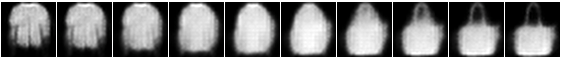

10x10 traversal of two latent dimensions

![10x10 traversal of two latent dimensions](https://i.imgur.com/hZXIYzv.png)

In [ ]:
# TODO: Plot latent traversals

### Visualize class labels in latent space

**TASK 5: Visualize class labels in latent space**

First create a new VAE-model with a 2d latent space on the full training data set. Then project all the images of the training set into the 2d latent space keeping track of their class labels. Use a 2d scatter plot to visualize the resulting latent space vectors and different colors for their labels. 

#### Train 2d latent space model

In [ ]:
# TODO: Train model with low dim latent space

#### Visualize classes

In [ ]:
# TODO: Visualize 2d

#### Questions

- Do images of the same class cluster in latent space?
- Do the data points in latent space look like a normal distribution?

**Your answer here:**

# Appendix *(Optional)*

Use standard MNIST or CIFAR-10 instead of fashion MNIST.

In [ ]:
transform = transforms.Compose([ 
   transforms.Resize(image_size),
   transforms.ToTensor(),
   transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(data_dir, train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(data_dir, train=False, transform=transforms.ToTensor())